# 從MNIST數字辨識來建構model
### Test loss: 3.53853705441
### Test accuracy: 0.501095804634 (50%)
### 使用灰階的圖 流失了許多資訊，依然能夠訓練到50%附近

In [23]:
label_dict= { 0:'free', 1:'computer', 2:'cellphone', 3:'coin', 4:'ruler',
        5:'thermos-bottle', 6:'whiteboard-pen', 7:'whiteboard-eraser', 8:'pen',
        9:'cup', 10:'remote-control-TV', 11:'remote-control-AC', 12:'switch',
        13:'windows', 14:'fridge', 15:'cupboard', 16:'water-tap', 17:'toy',
        18:'kettle', 19:'bottle', 20:'cookie', 21:'book', 22:'magnet', 23:'lamp-switch'}

### 將資料讀入
### training data: (x_img_train, y_label_train), ndarray(28, 28)
### testing data: (x_img_test, y_label_test), ndarray

In [52]:
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (14992, 28, 28)  labels: (14992,)
test  data: images: (12776, 28, 28)  labels: (12776,)


### 將訓練用的資料洗牌一下，讓資料的分布均勻一些

In [22]:
from sklearn.utils import shuffle
x_img_train, y_label_train = shuffle(x_img_train, y_label_train, random_state=0)
x_img_test, y_label_test = shuffle(x_img_test, y_label_test, random_state=0)

### 畫圖去看label跟圖片的對應關係

In [28]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=24):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

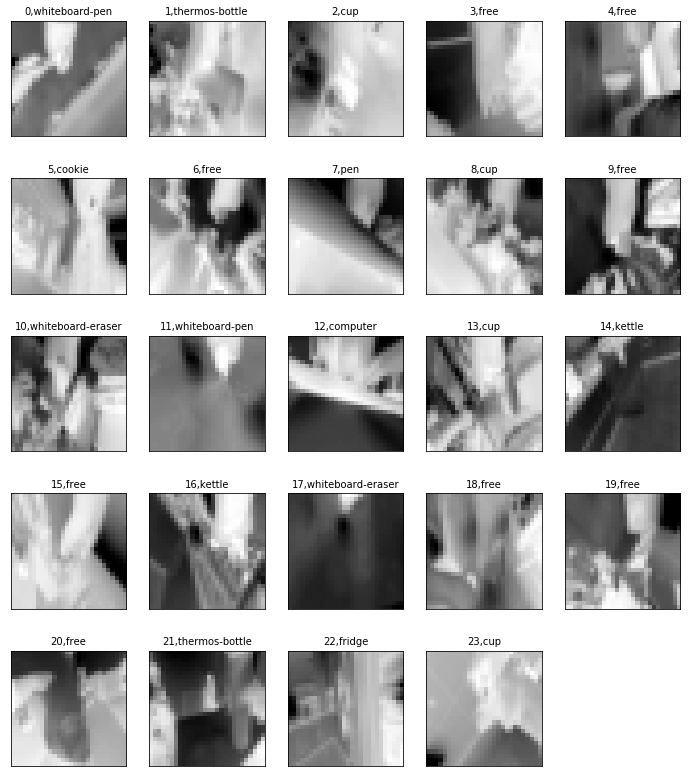

In [29]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

### 以下建構model (黑白圖像辨識)
### Reference: https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [38]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 24
epochs = 100

# input image dimensions
img_rows, img_cols = 28, 28

(x_train, y_train)=(x_img_train, y_label_train)
(x_test, y_test)=(x_img_test, y_label_test)


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# One-Hot Encoding
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

train_history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (14992, 28, 28, 1)
14992 train samples
12776 test samples
Train on 14992 samples, validate on 12776 samples
Epoch 1/100
14992/14992 [==============================] - 1s - loss: 2.1658 - acc: 0.4773 - val_loss: 2.0069 - val_acc: 0.5009
Epoch 2/100
14992/14992 [==============================] - 1s - loss: 1.8998 - acc: 0.4931 - val_loss: 2.0141 - val_acc: 0.5150
Epoch 3/100
14992/14992 [==============================] - 1s - loss: 1.6675 - acc: 0.5369 - val_loss: 2.1341 - val_acc: 0.5079
Epoch 4/100
14992/14992 [==============================] - 1s - loss: 1.4731 - acc: 0.5841 - val_loss: 1.9224 - val_acc: 0.5146
Epoch 5/100
14992/14992 [==============================] - 1s - loss: 1.3339 - acc: 0.6219 - val_loss: 2.0757 - val_acc: 0.4770
Epoch 6/100
14992/14992 [==============================] - 1s - loss: 1.2183 - acc: 0.6499 - val_loss: 2.0582 - val_acc: 0.4993
Epoch 7/100
14992/14992 [==============================] - 1s - loss: 1.1080 - acc: 0.6784 - val_loss: 2.0066

In [39]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

### Accuracy: 隨著train accuracy的上升，test accuracy並未有顯著的增加 (都在0.5上下震盪)

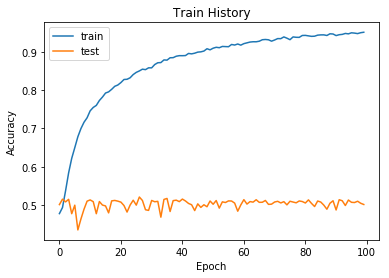

In [40]:
show_train_history('acc','val_acc')

### Train loss 下降，反而帶著Test loss上升 
### (雖然有加入dropout，但是over fitting的狀況依然是嚴重的)
ps. 下面這張圖的縱座標是loss，不小心打錯了

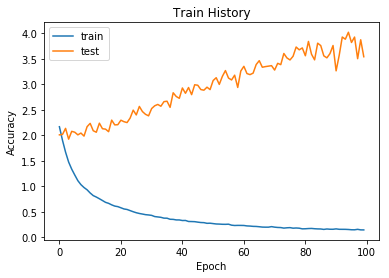

In [41]:
show_train_history('loss','val_loss')

# MNIST 數字辨識(附錄)
原本的這個model在數字辨識上，可以超過98%的accuracy，

無奈在這次作業的model上面，並不適用。

Reference: https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py

In [51]:
from keras.datasets import mnist

In [62]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [63]:
x_train.shape

(60000, 28, 28)

In [64]:
y_train.shape

(60000,)

In [65]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [66]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [67]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [68]:
train_history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 3s - loss: 0.3234 - acc: 0.9026 - val_loss: 0.0729 - val_acc: 0.9785
Epoch 2/12
60000/60000 [==============================] - 3s - loss: 0.1127 - acc: 0.9665 - val_loss: 0.0529 - val_acc: 0.9828
Epoch 3/12
60000/60000 [==============================] - 3s - loss: 0.0875 - acc: 0.9741 - val_loss: 0.0452 - val_acc: 0.9852
Epoch 4/12
60000/60000 [==============================] - 3s - loss: 0.0714 - acc: 0.9792 - val_loss: 0.0374 - val_acc: 0.9873
Epoch 5/12
60000/60000 [==============================] - 3s - loss: 0.0626 - acc: 0.9810 - val_loss: 0.0381 - val_acc: 0.9878
Epoch 6/12
60000/60000 [==============================] - 3s - loss: 0.0563 - acc: 0.9830 - val_loss: 0.0364 - val_acc: 0.9880
Epoch 7/12
60000/60000 [==============================] - 3s - loss: 0.0528 - acc: 0.9848 - val_loss: 0.0314 - val_acc: 0.9898
Epoch 8/12
60000/60000 [==============================] - 3s 

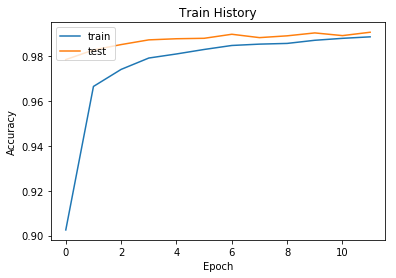

In [69]:
show_train_history('acc','val_acc')

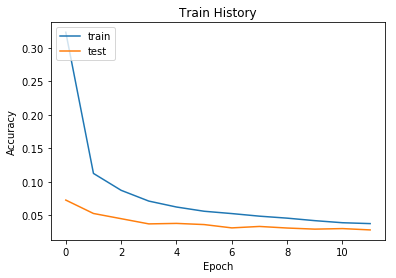

In [70]:
show_train_history('loss','val_loss')

## 註解
看著這個model 在數字辨識上的效果不錯(超過98%的train accuracy)，

讓我想要試著將原本的圖片拿來轉成黑白，

用相同的model跑跑看。

下面兩張圖是轉成黑白之後的樣子，

大圖(1920,1080) -> 小圖(28, 28)

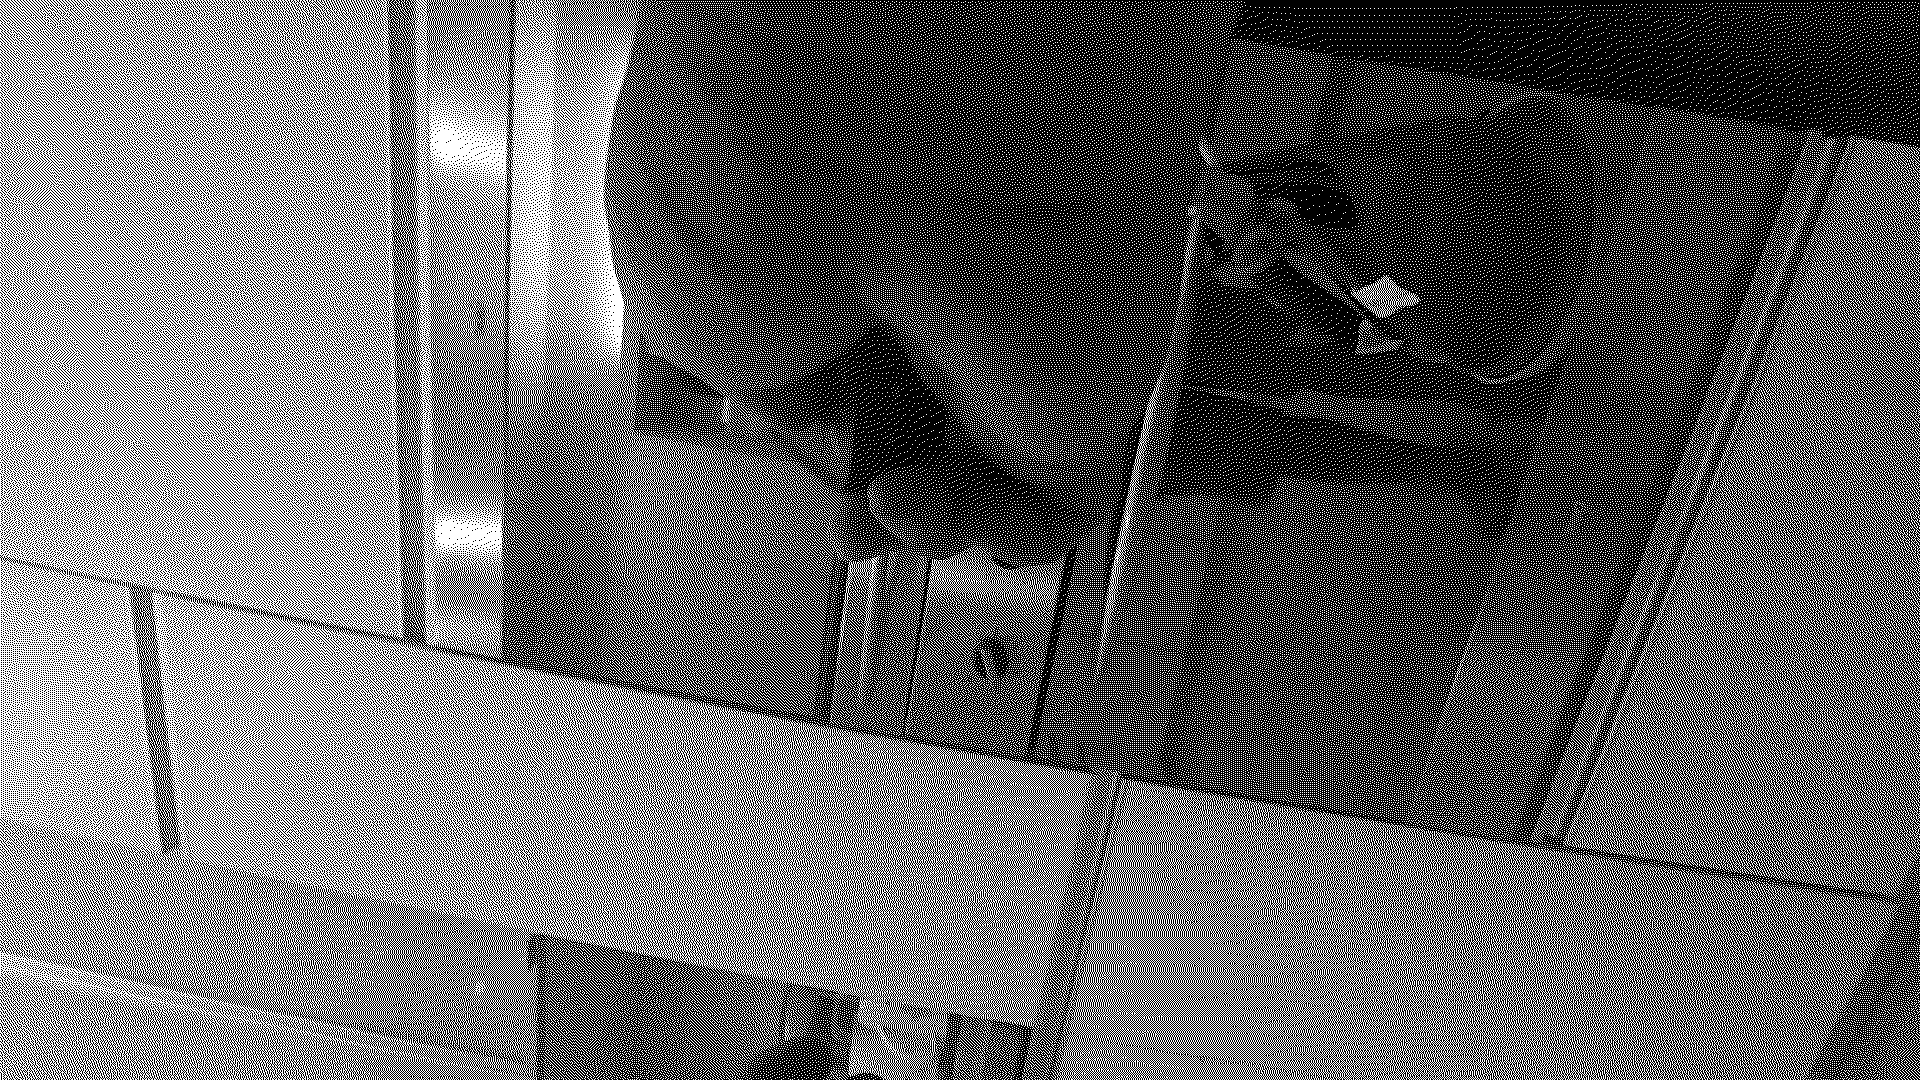

In [48]:
image_file

In [67]:
img